# HW3 (20')

## Submit as an HTML or PDF file

Print your name (First Name and Last Name) below

In [2]:
print("Joseph Lee")

Joseph Lee


- Import the `numpy` and `matplotlib` packages and rename them to their alias.
- Import `scipy` (no renaming).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## (a) Compute a probability mass function for Poisson distribution with a parameter $\lambda$. 

$P(X=k) = \lambda^k \exp(-\lambda)/k!$, where $k\in\mathbb{N}_0$

Calculate $P(X=k)$ when
- $\lambda=1.5$
- $k=5$

To get full points:
- First define each of these input variables and assign them with pre-specified values **(1')**
- For the factorial, you can use `np.arange()` and `np.prod()` **(1')**
- Define `P_val` and write the formula above **(1')**
- Use the built-in function `scipy.stats.poisson.pmf()` to compute the pmf, denoted as `P_scipy_val` **(1')**
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html 
- Print two results together **(1')**

In [33]:
# lambda_val = rate parameter of the Poisson distribution
# Notice that lambda itself is a reserved keyword in Python, so we need to come up with a different name.
# k_val is the input, which takes values from the entire natural number set. 
# here we calculate a particular option when k_val=5.
# P_val = ...
# Use built-in function to compute the PMF, denoted as P_scipy
# P_scipy_val = ...
# Write your own code

lamda_val = 1.5
k_val = 5

#5! = 1*2*3*4*5 = 120
k_factorial = np.prod(np.arange(1,k_val+1)) # np.arange goes up to but not including stop number (need to add +1)
print(k_factorial)

P_val = (lamda_val**k_val)*np.exp(-lamda_val)/k_factorial
print("P_val=", P_val)

#pmf(k, mu, loc=0) --- from scipy.org link above
P_scipy_val = scipy.stats.poisson.pmf(k_val, lamda_val, loc=0)
print("P_scipy_val=", P_scipy_val)


120
P_val= 0.014119955446892825
P_scipy_val= 0.014119955446892832


## (b) Composite operations on arrays

<font color='red'> **To develop a good naming habit, I recommend you add the type information to the name of the variable. For example, if it is a scalar, you can add `_val`; if it is a vec, you can add `_vec`; if it is a matrix, you can add `_mat`, if it is a boolean, you can add `_bool`, etc.** </font>

- Define `r_val` as 0.06
- Define two arrays $a$ and $t$ using `np.array()`, renaming them as `a_vec` and `t_vec`, assigning the following values: **(1')**

$ a = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} 20 \\ 30 \\ 15 \end{pmatrix}, \qquad t = \begin{pmatrix} t_0 \\ t_1 \\ t_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 2 \end{pmatrix} $

- Use element-by-element vector operations to compute a new array `m_vec` of length 3 as follows: **(1')** <br>

$ m = \begin{pmatrix} a_0 / (1+r)^{t_0} \\ a_1 / (1+r)^{t_1} \\ a_2 / (1+r)^{t_2} \end{pmatrix} $

- Compute the sum of the values of $m$ **(1')**
    - You can either use `np.sum()` or `m_vec.sum()`.
    - I am using subscripts to denote the individual elements of $a$ and $t$. In the code just enter the values of $a$ and $t$.

- Compute the inner product (or Euclidean distance) of `m_vec` manually.
- $||m||_2 = \sqrt{m^\top * m}$, where $^\top$ is the transpose operator, and $*$ is the matrix operator (not element-wise multiplication).
  - You can use `^T` to compute transpose or use `np.transpose()`. **(1')**
  - You can use `@` to perform matrix multiplication or use `np.matmul()`. Make sure the dimension is correct. **(1')**
  - Use `np.sqrt()` to compute the square root.
  - Print out your final result and compare it to the built-in function `np.linalg.norm(m_vec, ord=2)`.


In [70]:
# Define r_val as 0.06
r_val = 0.06

#Define two arrays and using np.array(), renaming them as a_vec and t_vec, assigning the following values:
a_vec = np.array([20,30,15])
t_vec = np.array([0,1,2])
print("a_vec=", a_vec)
print("t_vec=", t_vec)

#Use element-by-element vector operations to compute a new array m_vec of length 3 as follows:
m_vec = np.array([a_vec[0]/(1+r_val)**t_vec[0], a_vec[1]/(1+r_val)**t_vec[1], a_vec[2]/(1+r_val)**t_vec[2]])
print("m_vec=", m_vec)

#Compute the sum of the values of m
sum_m = m_vec.sum()
print("sum of m =", sum_m)

#inner product (or Euclidean distance) of m_vec manually.
inner_product = m_vec.T @ m_vec      # same as np.dot(m_vec, m_vec)
print("Inner product of m_vec =", inner_product)

manual = np.sqrt(inner_product)
print("manual=", manual)

built_in = np.linalg.norm(m_vec, ord=2)
print("built_in", built_in)

a_vec= [20 30 15]
t_vec= [0 1 2]
m_vec= [20.         28.30188679 13.3499466 ]
sum of m = 61.65183339266643
Inner product of m_vec = 1379.2178702413707
manual= 37.13782263732448
built_in 37.13782263732448


## (c) Plot a standard student-t random vector

To get full points:

- Observe the naming tradition mentioned above.
- Set a seed with a number `612`. **(1')**
- Define parameters and sample size and assign them to pre-specified values ahead of time.
    - `df=1` and `size = 1000`.
    - When degree of freedom (`df`) is 1, the student-t distribution is also known as a Cauchy distribution.
        - It does not have a valid mean nor variance. (You will have a clearer idea when you see the histogram!)
    - Use `ny.random.standard_t()` to generate random samples from standard student-t distributions. **(1')**
- Create a histogram plot **(1')**
    - Change the default color to `skyblue`. **(1')**
    - Label the x, y axes and title properly. **(1')**
    - **Optional**: You can change the number of `bins` in the `plt.hist()` function to obtain a granular view of the histogram. 

student_t_samples= [-8.46485659e-03 -2.22425199e+00  1.76265412e-01 -3.83817908e+00
 -1.20234169e+00  1.52888925e+00 -1.24136506e+00 -1.04387134e-01
  3.57566644e-01  5.95515352e-01 -1.26968047e+00 -1.62853236e+00
 -4.64690973e-01  2.31373214e-01 -6.19099930e-01  1.25409988e+00
 -7.73162617e-01 -1.14433096e-02 -9.81863859e+00  1.95109398e-01
  3.24870768e-01  3.44481674e-01  7.08232057e-02  1.39884005e-01
  9.70703068e-01  8.86370750e-01  8.73741102e-01 -2.32328869e+00
  3.71224704e-01  3.55087420e-01 -1.25497266e+00 -3.73647228e-01
 -2.75800178e+02  1.98337522e+00  1.98434034e-01  6.39596015e-01
 -8.76881389e-01  2.04635759e+00 -5.96973497e-01 -2.12545309e+00
 -1.63539021e-01  8.10667171e+00  4.42303703e-01  8.68825728e-01
  5.05040574e-01  1.17989348e+00  4.29632902e-01 -2.20018450e-02
  1.38774051e+00  6.51662420e-01  6.35235386e-01 -3.78628699e-02
  3.50827051e-01 -8.07567125e-01 -3.00249605e+00  3.43281068e+00
  7.62335609e-02 -1.99962525e+00 -1.10847687e+00  1.68076454e+00
 -9.49

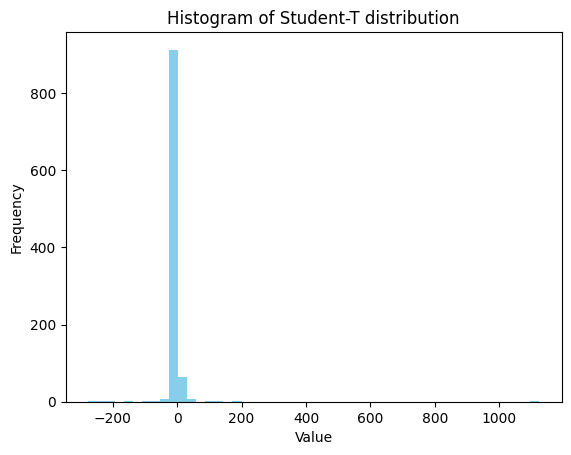

In [75]:
#Set a seed with a number 612
np.random.seed(612)

#Define parameters and sample size and assign them to pre-specified values ahead of time.
df = 1
size = 1000

#numpy.random.standard_t(df, size=None)
student_t_samples = np.random.standard_t(df=df, size=size)
print("student_t_samples=", student_t_samples)

plt.hist(student_t_samples, bins=50, color="skyblue")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Student-T distribution")
plt.show()

## (d) Checking whether word is part of list

- Define a variable `disease_type_str` with the value **"Phobic anxiety disorders"** **(1')**
- Define a list of anxiety types `anxiety_ls` with names from the following link: **(1')**
    - https://www.icd10data.com/ICD10CM/Codes/F01-F99/F40-F48
    - This is the code for diagnoses related to mental health, specifically anxiety, dissociative, stress-related, somatoform, and other nonpsychotic mental disorders.
    - Do not copy the codes!
- Use `anxiety_ls.index()` function to export and print out the location of **"Somatoform disorders"** **(1')** 
- Write an expression to test whether `disease_type_str` is contained in `anxiety_ls` and store the result in a variable `result_bool_1` **(1')**
- Change `disease_type_str` to **"Manic episode"** and replicate the above step with another resulting variable `result_bool_2` **(1')**

To get full points run all of the above commands

In [64]:
# Define a variable disease_type_str with the value "Phobic anxiety disorders"

disease_type_str = "Phobic anxiety disorders"

#Define a list of anxiety types anxiety_ls with names from the following link

anxiety_ls = ["Phobic anxiety disorders", "Other anxiety disorders", "Obsessive-compulsive disorder", "Reaction to severe stress, and adjustment disorders", "Dissociative and conversion disorders", "Somatoform disorders", "Other nonpsychotic mental disorders"]

#Use anxiety_ls.index() function to export and print out the location of "Somatoform disorders"

location_somatoform = anxiety_ls.index("Somatoform disorders")
print("location of somatoform disorders=", location_somatoform)

#Write an expression to test whether disease_type_str is contained in anxiety_ls and store the result in a variable result_bool_1

result_bool_1 = disease_type_str in anxiety_ls
print("result_bool1 =", result_bool_1)

#Change disease_type_str to "Manic episode" and replicate the above step with another resulting variable result_bool_2

disease_type_str = "Manic episode"
result_bool_2 = disease_type_str in anxiety_ls
print("result_bool2 =", result_bool_2)

location of somatoform disorders= 5
result_bool1 = True
result_bool2 = False


## (e) Classifying the anxiety level based on GAD-7 evaluation

Generalized Anxiety Disorder can be evaluated using a 7-item questionnaire (GAD-7) with a total score ranging from 0 to 21, where higher scores indicate more severe anxiety. 
- The score levels are generally interpreted as
    - 0-4: Minimal
    - 5-9: Mild
    - 10-14: Moderate
    - 15-21: Severe
- A score >= 10 suggested a potential diagnosis of GAD, warranting further clinical evaluation or intervention.
- You can find more details here: https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf.
- Define a new variable `gad7_val` and assign the value to 6, 12, and 20. 
- Write an `if/elif/else` statement that prints out the corresponding ordinal level for the above three numerical values. **(2')**
- Since we haven't covered functions yet, when you change `gad7_val` to a new value, you need to copy your existing control flow codes and reun them in a new code chunk. I provide three empty code chunks below for you to work on each scenario. **(3')** Each scenario's output counts as 1 point.

In [67]:
# Define a new variable gad7_val and assign the value to 6, 12, and 20.
gad7_val = 6

if 0 <= gad7_val <=4:
    print("level = Minimal")
elif 5 <= gad7_val <=9:
    print("level = Mild")
elif 10 <= gad7_val <=14:
    print("level = Moderate")
elif 15 <= gad7_val <=21:
    print("level = Severe")



level = Mild


In [68]:
gad7_val = 12

if 0 <= gad7_val <=4:
    print("level = Minimal")
elif 5 <= gad7_val <=9:
    print("level = Mild")
elif 10 <= gad7_val <=14:
    print("level = Moderate")
elif 15 <= gad7_val <=21:
    print("level = Severe")

level = Moderate


In [69]:
gad7_val = 20

if 0 <= gad7_val <=4:
    print("level = Minimal")
elif 5 <= gad7_val <=9:
    print("level = Mild")
elif 10 <= gad7_val <=14:
    print("level = Moderate")
elif 15 <= gad7_val <=21:
    print("level = Severe")

level = Severe
